In [1]:
#ch07_01_MLP.ipynb

In [2]:
#step1.1 匯入所需模組, keras.utils.np_utils
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#step1.2 從keras.dataset 讀取 mnist 資料集
from keras.datasets import mnist
#step1.2.1 以mnist.load_data() method 讀取資料,(train/test)
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [4]:
#step1.3 將features(28x28 數字影像特徵值) reshape 為 1 dimension array (784),並轉換為float
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [5]:
#step1.4 將1.3的features標準化 (0.0~255.0)-->(0.0~1.0)
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [6]:
#step1.5 將label值(0,1,~9) One-hot encoding 編碼, 使用 np_utils.to_categorical() method
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [7]:
#=======================================================================================

In [8]:
#step2. 建立MLP模型, 輸入層(x),784個神經元;  隱藏層(h),256個神經元; 輸出層(y),10個神經元 

In [9]:
#step2.1 輸入所需模組 keras.model.Sequentail, keras.layers.Dense
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#defined function eval_hp_batchSize(batchSize=32,hiddenNum=256)
def eval_hp_batchSize(batchSize=32,hiddenNum=256):
    s_model=Sequential()

    s_model.add(Dense(units=hiddenNum,                      
                     input_dim=784,                  
                     kernel_initializer='normal',     
                     activation='relu'))

    s_model.add(Dense(units=10,                     
                     kernel_initializer='normal',   
                     activation='softmax'))  

    s_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',metrics=['accuracy'])

    s_model.fit(x=x_Train_normalize,
                y=y_Train_OneHot,validation_split=0.2,
                epochs=10,batch_size=batchSize,verbose=2) 

    score=s_model.evaluate(x_Test_normalize,y_Test_OneHot)

    return score[1]

In [11]:
# Call function eval_hp_batchSize
eval_hp_batchSize()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2698 - acc: 0.9224 - val_loss: 0.1324 - val_acc: 0.9610
Epoch 2/10
 - 3s - loss: 0.1077 - acc: 0.9681 - val_loss: 0.1023 - val_acc: 0.9696
Epoch 3/10
 - 3s - loss: 0.0712 - acc: 0.9783 - val_loss: 0.0932 - val_acc: 0.9733
Epoch 4/10
 - 3s - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0810 - val_acc: 0.9758
Epoch 5/10
 - 3s - loss: 0.0377 - acc: 0.9879 - val_loss: 0.0780 - val_acc: 0.9748
Epoch 6/10
 - 3s - loss: 0.0263 - acc: 0.9921 - val_loss: 0.0765 - val_acc: 0.9784
Epoch 7/10
 - 3s - loss: 0.0201 - acc: 0.9938 - val_loss: 0.0869 - val_acc: 0.9769
Epoch 8/10
 - 3s - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0830 - val_acc: 0.9788
Epoch 9/10
 - 3s - loss: 0.0133 - acc: 0.9961 - val_loss: 0.0922 - val_acc: 0.9776
Epoch 10/10
 - 3s - loss: 0.0113 - acc: 0.9965 - val_loss: 0.0997 - val_acc: 0.9758
10000/10000 [==============================] - 0s 15us/step


0.9754

In [11]:
#設定batch size 參數均格 bspg
bspg=range(10,200,20)
#score
score=[]
bestScore=0
bestBatchSize=10

for bs in bspg:
    scr=eval_hp_batchSize(batchSize=bs,hiddenNum=256)
    score.append(scr)
    if scr > bestScore:
        bestScore=scr
        bestBatchSize=bs

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 20s - loss: 0.2214 - acc: 0.9346 - val_loss: 0.1145 - val_acc: 0.9660
Epoch 2/10
 - 18s - loss: 0.0912 - acc: 0.9722 - val_loss: 0.0888 - val_acc: 0.9737
Epoch 3/10
 - 18s - loss: 0.0605 - acc: 0.9799 - val_loss: 0.0919 - val_acc: 0.9724
Epoch 4/10
 - 18s - loss: 0.0440 - acc: 0.9860 - val_loss: 0.0923 - val_acc: 0.9732
Epoch 5/10
 - 18s - loss: 0.0336 - acc: 0.9894 - val_loss: 0.0845 - val_acc: 0.9762
Epoch 6/10
 - 16s - loss: 0.0254 - acc: 0.9912 - val_loss: 0.0884 - val_acc: 0.9794
Epoch 7/10
 - 11s - loss: 0.0217 - acc: 0.9925 - val_loss: 0.1091 - val_acc: 0.9732
Epoch 8/10
 - 9s - loss: 0.0199 - acc: 0.9935 - val_loss: 0.1050 - val_acc: 0.9770
Epoch 9/10
 - 10s - loss: 0.0161 - acc: 0.9944 - val_loss: 0.1137 - val_acc: 0.9753
Epoch 10/10
 - 11s - loss: 0.0142 - acc: 0.9950 - val_loss: 0.1159 - val_acc: 0.9777
10000/10000 [==============================] - 0s 20us/step
Train on 48000 samples, validate on 12000 samples


Epoch 9/10
 - 1s - loss: 0.0321 - acc: 0.9917 - val_loss: 0.0851 - val_acc: 0.9757
Epoch 10/10
 - 1s - loss: 0.0266 - acc: 0.9936 - val_loss: 0.0865 - val_acc: 0.9752
10000/10000 [==============================] - 0s 22us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4342 - acc: 0.8823 - val_loss: 0.2186 - val_acc: 0.9394
Epoch 2/10
 - 1s - loss: 0.1888 - acc: 0.9471 - val_loss: 0.1515 - val_acc: 0.9587
Epoch 3/10
 - 1s - loss: 0.1331 - acc: 0.9620 - val_loss: 0.1260 - val_acc: 0.9647
Epoch 4/10
 - 1s - loss: 0.1004 - acc: 0.9715 - val_loss: 0.1117 - val_acc: 0.9678
Epoch 5/10
 - 1s - loss: 0.0796 - acc: 0.9772 - val_loss: 0.0980 - val_acc: 0.9707
Epoch 6/10
 - 1s - loss: 0.0648 - acc: 0.9818 - val_loss: 0.0919 - val_acc: 0.9730
Epoch 7/10
 - 1s - loss: 0.0531 - acc: 0.9849 - val_loss: 0.0860 - val_acc: 0.9749
Epoch 8/10
 - 1s - loss: 0.0433 - acc: 0.9886 - val_loss: 0.0823 - val_acc: 0.9748
Epoch 9/10
 - 1s - loss: 0.0357 - acc: 0.9907 - val_loss: 0

In [12]:
score

[0.9784, 0.978, 0.9758, 0.9778, 0.9781, 0.9776, 0.9799, 0.9782, 0.9774, 0.9789]

In [13]:
bestBatchSize

130

In [14]:
#繪圖檢視
import matplotlib.pyplot as plt
%matplotlib inline

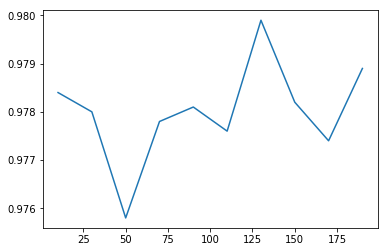

In [15]:
plt.plot(bspg,score)